
# **Задача оптимізації часу роботи складу**


### Мета дослідження:
Метою даного дослідження є розробка ефективної стратегії розміщення товарів на складі з метою мінімізації часу доступу до них та максимізації використання простору.



### Задачі дослідження:
- Формалізація Даних: Визначення представлення даних, відстань між секціями, місткість кожної секції, частота використання товарів та інші параметри.
- Цільова Функція: Розробка цільової функції, яка враховує мінімізацію загального шляху, який працівники складу повинні подолати при переміщенні товарів.
- Обмеження: Врахування обмежень складу, включаючи максимальну місткість секцій, обмеження на площу та максимальну кількість товарів в секції.
- Реалізація на Python: Написання програми на мові Python з використанням бібліотек для розв'язання лінійної програми.

### Об'єкт дослідження:
Об'єктом дослідження є система складського господарства, де необхідно оптимізувати розташування товарів у зонах для забезпечення оптимальної продуктивності.



### Предмет дослідження:
Предметом дослідження є математична модель оптимізації складу та її реалізація за допомогою лінійного програмування для досягнення визначених цілей.

### Кінцевий результат:
Кінцевим результатом дослідження є розробка програми оптимізації розподілу запасів на складі. Ця програма повинна бути здатна мінімізувати загальний час доступу до товарів, забезпечувати оптимальне використання складського простору та враховувати різноманітні обмеження складу.

### Математична Модель:

#### Позначення:
- $x_{ij}$ - кількість одиниць товару ( i ) розміщених в зоні ( j \).
- $ s_i $ - розмір (об'єм) товару \( i \).
- $ m_i $ - масса товару ( i ).
- $ p_i $ - популярність товару ( i ), за шкалою від 1 до 10, де найпопулярніший товар з оцінкой 1.
- $ t_j $ - віддаленість зони ( j ) (час).
- $Max_{s}$ - вмістимість зони ( j ).
- $Max_{x_i}$ - кількість одиниць товару ( i ).
- $T_{ij}$ - час доступу до товару ( i ) в зоні ( j ).

##### Час доступо до товраів розраховується як:
$ T_{ij} = 0.7s_i + 0.4m_i + t_j$
#### Цільова Функція:
Маємо за мету мінімізувати сумарний час доступу до товарів на складі:
$ \text{min} Z = \sum_{i} \sum_{j} x_{ij} \times p_i \times T_j$

#### Обмеження:
1. **Вмістимість зон:**
    $ \sum_{i} x_{ij} \times s_i \leq \text{Max}_{s} $

2. **Кількість товарів:**
   $ \sum_{j} x_{ij} \leq \text{Max}_{x_i} $

3. **Всі товари мають бути розміщені:**
  $ \sum_{i} \sum_{j} x_{ij} = \sum_{j} Max_{s} $

4. **Необхідно врахувати цілочисельність та невідємність кількості товарів в кожній зоні:**
   $ x_{ij} \geq 0, \quad x_{ij} \in \mathbb{Z} $




###Методи оптимізації:
В дослідження був використаний метод `Branch and Cut`. Він поєднує в собі два підходи: метод гілок та границь (Branch and Bound) і метод розрізання (Cutting Plane).

1. Метод гілок та границь використовується для розбиття задачі на менші підзадачі (гілки) та обмеження простору пошуку шляхом встановлення верхньої та нижньої границь для кожної підзадачі.

2. Метод розрізання використовується для покращення верхньої границі шляхом додавання нових обмежень до початкової задачі.

Branch and Cut поєднує ці два методи для ефективного розв'язання комбінаторних оптимізаційних задач, зокрема задач цілочисельної лінійної оптимізації. Він використовує гілки та границі для розбиття задачі на менші підзадачі та обмеження простору пошуку, а також використовує метод розрізання для покращення верхньої границі.

### DFD-діаграма:


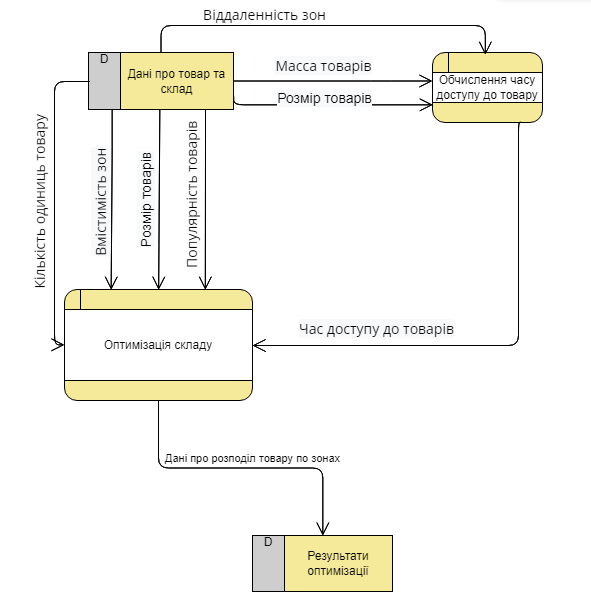

### Інструменти:


- **Мова Програмування:** Python (використовуючи бібліотеки для математичного програмування).
- **Бібліотека для Оптимізації:** `PuLP` для вирішення оптимізаційних задач, а саме солвер `PULP_CBC_CMD`.
- **Допоміжні бібліотеки:** `matplotlib` для візуалізації результатів, `numpy` для роботи з данними, `textwrap` для зручного виведення тексту


##Реалізація на мові Python:

###Встановлення бібліотеки `Pulp`

In [ ]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 27.1 MB/s eta 0:00:00


### Імпорт необхіних модулів:

In [ ]:
import numpy as np
from pulp import LpProblem, LpVariable, lpSum, LpMinimize, LpInteger, PULP_CBC_CMD
import textwrap
import matplotlib.pyplot as plt

### Задання та обчислення вхідних параметрів:

In [ ]:
# Параметри задачі
num_products = 10
num_zones = 5

# Популярність товарів (розмір вектора: num_products)
p = np.array([8, 5, 3, 9, 7, 2, 6, 10, 4, 1])

# Розмір товарів (розмір вектора: num_products)
s = np.array([1.2, 2.5, 3.8, 2.0, 4.2, 1.8, 3.0, 4.5, 5.2, 2.7])

# Маси товарів (розмір вектора: num_products)
m = np.array([15, 25, 18, 30, 22, 12, 28, 40, 50, 20])

# Дальність зон (розмір вектора: num_zones)
zone_distances = np.array([12, 8, 15, 5, 10])

# Максимальна вмістимість зон (розмір вектора: num_zones)
Max_s = np.array([300, 250, 350, 288, 290])

# Максимальна кількість одиниць товару (розмір вектора: num_products)
Max_x = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 100])

# Загальна кількість товарів (сума Max_x)
Total_max_x = np.sum(Max_x)



# Виведення таблички для товарів
print("Products Table:")
print("{:<10} {:<12} {:<8} {:<8}".format("Product", "Popularity", "Size", "Max Quantity"))
for i in range(num_products):
    print("{:<10} {:<12} {:<8} {:<8}".format(i + 1, p[i], s[i], Max_x[i]))

# Виведення таблички для зон складу
print("\nZones Table:")
print("{:<10} {:<12} {:<12}".format("Zone", "Distance", "Max Capacity"))
for j in range(num_zones):
    print("{:<10} {:<12} {:<12}".format(j + 1, zone_distances[j], Max_s[j]))

Products Table:
Product    Popularity   Size     Max Quantity
1          8            1.2      90      
2          5            2.5      80      
3          3            3.8      70      
4          9            2.0      60      
5          7            4.2      50      
6          2            1.8      40      
7          6            3.0      30      
8          10           4.5      20      
9          4            5.2      10      
10         1            2.7      100     

Zones Table:
Zone       Distance     Max Capacity
1          12           300         
2          8            250         
3          15           350         
4          5            288         
5          10           290         


### Обчислення матриці T

In [ ]:
T = 0.7 * np.outer(s, np.ones(num_zones)) + 0.3 * np.outer(m, np.ones(num_zones)) + zone_distances


print("Access Time Matrix:")
for i in range(num_products):
    for j in range(num_zones):
        print(f"{T[i, j]:.2f}\t", end="")
    print()

Access Time Matrix:
17.34	13.34	20.34	10.34	15.34	
21.25	17.25	24.25	14.25	19.25	
20.06	16.06	23.06	13.06	18.06	
22.40	18.40	25.40	15.40	20.40	
21.54	17.54	24.54	14.54	19.54	
16.86	12.86	19.86	9.86	14.86	
22.50	18.50	25.50	15.50	20.50	
27.15	23.15	30.15	20.15	25.15	
30.64	26.64	33.64	23.64	28.64	
19.89	15.89	22.89	12.89	17.89	


### Cворення моделі, задання обмеженнь та вирішення задачі:

In [ ]:
# Створення об'єкту задачі
model = LpProblem(name="warehouse_optimization", sense=LpMinimize)

# Змінні рішення
x = LpVariable.dicts("x", ((i, j) for i in range(num_products) for j in range(num_zones)), lowBound=0, cat=LpInteger)

# Функція для мінімізації
model += lpSum([x[i, j] * p[i] * T[i, j] for i in range(num_products) for j in range(num_zones)])

# Обмеження вмістимості зон
for j in range(num_zones):
    model += lpSum([x[i, j] * s[i] for i in range(num_products)]) <= Max_s[j]

# Обмеження кількості товарів
for i in range(num_products):
    model += lpSum([x[i, j] for j in range(num_zones)]) <= Max_x[i]

# Обмеження, що всі товари мають бути розміщені
model += lpSum([x[i, j] for i in range(num_products) for j in range(num_zones)]) == Total_max_x

# Обмеження, що кількість товару має бути невід'ємною
for i in range(num_products):
    for j in range(num_zones):
        model += x[i, j] >= 0

# Вирішення задачі
solver = PULP_CBC_CMD()
model.solve(solver)

1

### Виведення обмежень та результатів:

In [ ]:
# Вивід тільки цільової функції та перших 16 обмежень з переносом рядків
print("Objective Function:")
print(textwrap.fill(str(model.objective), width=150))
print("\nConstraints:")
for i, (name, constraint) in enumerate(model.constraints.items()):
    if i < 16:
        print(textwrap.fill(f"{name}: {constraint}", width=150))


# Вивід результату
print("\nOptimal values:")
for i in range(num_products):
    for j in range(num_zones):
        if x[i, j].value() != 0:
            print(f"x[{i+1},{j+1}] = {x[i, j].value()}")

# print("\nOptimal objective value:")
# print(model.objective.value())


Objective Function:
138.72*x_(0,_0) + 106.72*x_(0,_1) + 162.72*x_(0,_2) + 82.72*x_(0,_3) + 122.72*x_(0,_4) + 106.25*x_(1,_0) + 86.25*x_(1,_1) + 121.25*x_(1,_2) +
71.25*x_(1,_3) + 96.25*x_(1,_4) + 60.17999999999999*x_(2,_0) + 48.17999999999999*x_(2,_1) + 69.17999999999999*x_(2,_2) + 39.17999999999999*x_(2,_3) +
54.17999999999999*x_(2,_4) + 201.6*x_(3,_0) + 165.6*x_(3,_1) + 228.6*x_(3,_2) + 138.6*x_(3,_3) + 183.6*x_(3,_4) + 150.78*x_(4,_0) + 122.78*x_(4,_1) +
171.78*x_(4,_2) + 101.78*x_(4,_3) + 136.78*x_(4,_4) + 33.72*x_(5,_0) + 25.72*x_(5,_1) + 39.72*x_(5,_2) + 19.72*x_(5,_3) + 29.72*x_(5,_4) +
135.0*x_(6,_0) + 111.0*x_(6,_1) + 153.0*x_(6,_2) + 93.0*x_(6,_3) + 123.0*x_(6,_4) + 271.5*x_(7,_0) + 231.5*x_(7,_1) + 301.5*x_(7,_2) + 201.5*x_(7,_3)
+ 251.5*x_(7,_4) + 122.56*x_(8,_0) + 106.56*x_(8,_1) + 134.56*x_(8,_2) + 94.56*x_(8,_3) + 114.56*x_(8,_4) + 19.89*x_(9,_0) + 15.89*x_(9,_1) +
22.89*x_(9,_2) + 12.89*x_(9,_3) + 17.89*x_(9,_4)

Constraints:
_C1: 1.2*x_(0,_0) + 2.5*x_(1,_0) + 3.8*x_(2,

## Візуалізація результатів:

### Груповий стовпчатий графік:

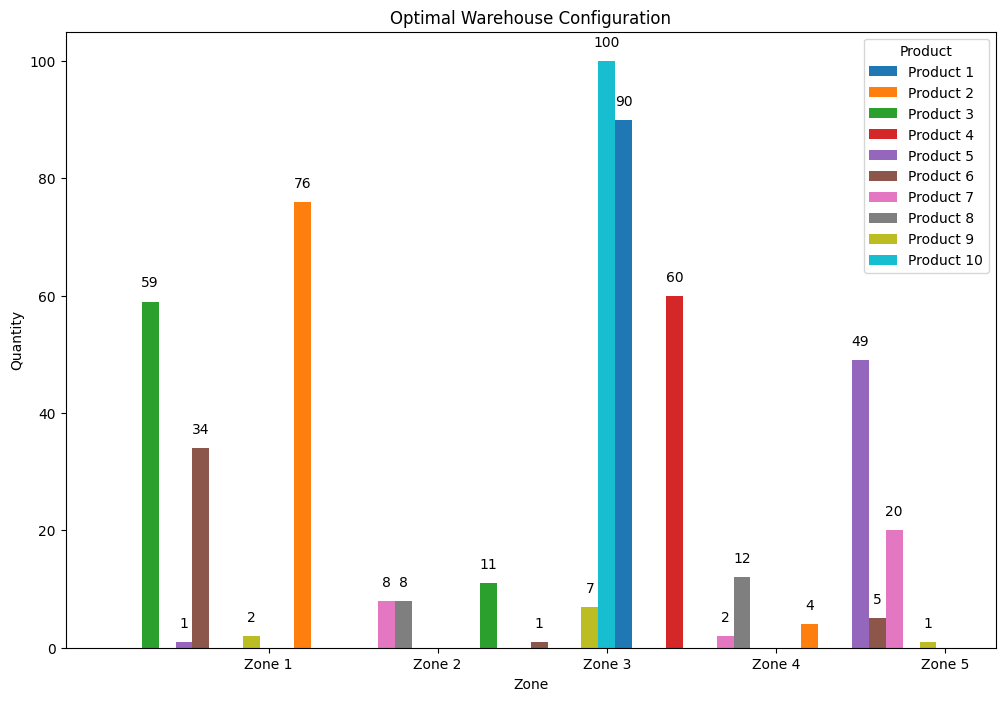

In [ ]:
optimal_values = {(i, j): x[i, j].value() for i in range(num_products) for j in range(num_zones)}

fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.1
bar_positions = np.arange(num_zones)

for i in range(num_products):
    products_in_zone = [optimal_values[i, j] for j in range(num_zones)]
    ax.bar(bar_positions + i * bar_width, products_in_zone, width=bar_width, label=f'Product {i+1}')

    for j, value in enumerate(products_in_zone):
        if value != 0:
            ax.text(i * bar_width + j, value + 2, str(int(value)), ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Zone')
ax.set_ylabel('Quantity')
ax.set_title('Optimal Warehouse Configuration')
ax.set_xticks(bar_positions + (num_products - 1) * bar_width)
ax.set_xticklabels([f'Zone {j+1}' for j in range(num_zones)])
ax.legend(title='Product')

plt.show()


### Теплова карта

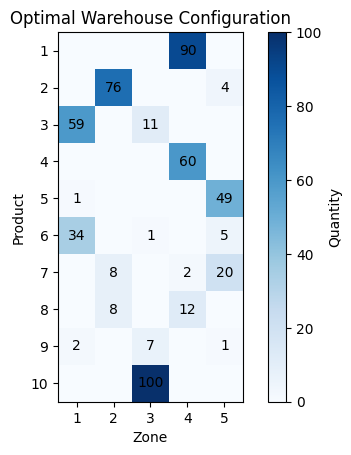

In [ ]:
# Здобуття оптимальних значень
optimal_values = np.zeros((num_products, num_zones))
for i in range(num_products):
    for j in range(num_zones):
        optimal_values[i, j] = x[i, j].value()

plt.imshow(optimal_values, cmap='Blues', interpolation='nearest')

for i in range(num_products):
    for j in range(num_zones):
        if optimal_values[i, j]:
          plt.text(j, i, f'{optimal_values[i, j]:.0f}', ha='center', va='center', color='Black')

# Налаштування графіку
plt.title('Optimal Warehouse Configuration')
plt.xlabel('Zone')
plt.ylabel('Product')
plt.colorbar(label='Quantity')
plt.xticks(np.arange(num_zones), np.arange(1, num_zones + 1))
plt.yticks(np.arange(num_products), np.arange(1, num_products + 1))
plt.show()
